In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# load the libraries
from bs4 import BeautifulSoup as Soup # For HTML parsing
#import urllib3 # Website connections
import urllib # Website connections
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd # For converting results to a dataframe and bar chart plots
import requests
%matplotlib inline

#### Now create a website parsing function.
This function just cleans up the raw html so that I can look at it.
   Inputs: a URL to investigate
   Outputs: Cleaned text only

In [3]:
def text_cleaner(website):
    
    try:
        site = urllib.request.urlopen(website).read() # Connect to the job posting
    except: 
        return   # Need this in case the website isn't there anymore or some other weird connection problem 
    
    soup_obj = Soup(site, "lxml") # Get the html from the site
    
    for script in soup_obj(["script", "style"]):
        script.extract() # Remove these two elements from the BS4 object
    
    

    text = soup_obj.get_text() # Get the text from this
    
        
    
    lines = (line.strip() for line in text.splitlines()) # break into lines
    
        
        
    chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) # break multi-headlines into a line each
    
    def chunk_space(chunk):
        chunk_out = chunk + ' ' # Need to fix spacing issue
        return chunk_out  
        
    
    text = ''.join(chunk_space(chunk) for chunk in chunks if chunk).encode('utf-8') # Get rid of all blank lines and ends of line
        
        
    # Now clean out all of the unicode junk (this line works great!!!)
        
    try:
        text = text.decode('unicode_escape').encode('ascii', 'ignore') # Need this as some websites aren't formatted
 
    except:                                                            # in a way that this works, can occasionally throw
        return                                                         # an exception
    
    text = str(text, 'unicode_escape')
    text = re.sub("[^a-zA-Z.+3]"," ", text)  # Now get rid of any terms that aren't words (include 3 for d3.js)
                                                # Also include + for C++    
       
    text = text.lower().split()  # Go to lower case and split them apart
        
        
    stop_words = set(stopwords.words("english")) # Filter out any stop words
    text = [w for w in text if not w in stop_words]
        
        
        
    text = list(set(text)) # Last, just get the set of these. Ignore counts (we are just looking at whether a term existed
                            # or not on the website)
        
    return text

#### As you can see in the code above, a lot of cleaning for the raw html is necessary to get the final terms we are looking for. It extracts the relevant portions of the html, gets the text, removes blank lines and line endings, removes unicode, and filters with regular expressions to include only words. To see what the final result looks like, let’s try calling this function on a sample job posting. The one I am using is a job posting for a Data Scientist at Indeed itself!

If you are reading the IPython Notebook interactively, the example job posting may have disappeared so you can try your own to see how the function works.

#### The Second Function: Accessing the Job Postings

This next function will allow us to search for “data scientist” jobs in a particular city (or nationally if we want to see everything!) and plot the final results in a bar chart so we can see which skills are most frequently desired.

This second function is fairly long, so I will try to explain how everything works through a lot of commentary. The basic idea is to look through Indeed’s pages of job results and click on all of the job links, but only in the center of the page where all of the jobs are posted (not on the edges). See an example here. I just want the URLs in the “center” column of the website. You can get an idea of how Indeed organized the website by using a browser like Firefox or Chrome. Right click on the page to see the “Inspect Element” option in Firefox and the HTML will now be visible to you.

    This function will take a desired city/state and look for all new job postings
    on Indeed.com. It will crawl all of the job postings and keep track of how many
    use a preset list of typical data science skills. The final percentage for each skill
    is then displayed at the end of the collation. 
        
    Inputs: The location's city and state. These are optional. If no city/state is input, 
    the function will assume a national search (this can take a while!!!).
    Input the city/state as strings, such as skills_info('Chicago', 'IL').
    Use a two letter abbreviation for the state.
    
    Output: A bar chart showing the most commonly desired skills in the job market for 
    a data scientist. 

#### Let’s now try running our new function on Seattle, Washington to see what results we get. Just as a note, all of these results were run on March 8, 2015 (with the exception of the national results that were run the next day).

There were 854 jobs found, Arlington
Getting page 1


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: DeprecationWarning: invalid escape sequence '\ '
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: DeprecationWarning: invalid escape sequence '\ '


Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Getting page 8
Getting page 9
Getting page 10
Getting page 11


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: DeprecationWarning: invalid escape sequence '\R'
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: DeprecationWarning: invalid escape sequence '\R'


Getting page 12
Getting page 13
Getting page 14
Getting page 15
Getting page 16
Getting page 17
Getting page 18
Getting page 19
Getting page 20
Getting page 21
Getting page 22
Getting page 23
Getting page 24
Getting page 25
Getting page 26
Getting page 27
Getting page 28
Getting page 29
Getting page 30
Getting page 31
Getting page 32
Getting page 33
Getting page 34
Getting page 35
Getting page 36
Getting page 37


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: DeprecationWarning: invalid escape sequence '\+'
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: DeprecationWarning: invalid escape sequence '\+'


Getting page 38
Getting page 39
Getting page 40


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: DeprecationWarning: invalid escape sequence '\F'
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: DeprecationWarning: invalid escape sequence '\F'


Getting page 41
Getting page 42
Getting page 43
Getting page 44
Getting page 45
Getting page 46
Getting page 47
Getting page 48
Getting page 49
Getting page 50


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: DeprecationWarning: invalid escape sequence '\L'
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: DeprecationWarning: invalid escape sequence '\L'


Getting page 51
Getting page 52
Getting page 53
Getting page 54
Getting page 55
Getting page 56
Getting page 57
Getting page 58
Getting page 59
Getting page 60
Getting page 61
Getting page 62
Getting page 63
Getting page 64
Getting page 65


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: DeprecationWarning: invalid escape sequence '\S'
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: DeprecationWarning: invalid escape sequence '\S'


Getting page 66
Getting page 67
Getting page 68
Getting page 69
Getting page 70
Getting page 71
Getting page 72
Getting page 73
Getting page 74
Getting page 75
Getting page 76
Getting page 77
Getting page 78
Getting page 79
Getting page 80
Getting page 81
Getting page 82
Getting page 83
Getting page 84
Getting page 85
Done with collecting the job postings!
There were 625 jobs successfully found.


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:146: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


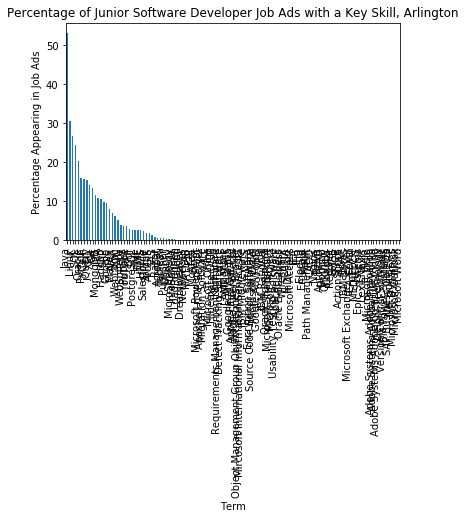

In [4]:
city = 'Arlington'
state = 'VA'

final_job = 'junior+software+developer' # searching for data scientist exact fit("data scientist" on Indeed search)
#final_job = 'dental_hygienist'   
# Make sure the city specified works properly if it has more than one word (such as San Francisco)
if city is not None:
    final_city = city.split() 
    final_city = '+'.join(word for word in final_city)
    final_site_list = ['http://www.indeed.com/jobs?q=%22', final_job, '%22&l=', final_city,
                    '%2C+', state] # Join all of our strings together so that indeed will search correctly
else:
    final_site_list = ['http://www.indeed.com/jobs?q="', final_job, '"']

final_site = ''.join(final_site_list) # Merge the html address together into one string

base_url = 'http://www.indeed.com'

html = urllib.request.urlopen(final_site).read() # Open up the front page of our search first

soup = Soup(html,'lxml') # Get the html from the first page
    
# Now find out how many jobs there were
    
num_jobs_area = soup.find(id = 'searchCount').string.encode('utf-8') # Now extract the total number of jobs found
                                                                        # The 'searchCount' object has this
num_jobs_area = str(num_jobs_area, 'utf-8')
job_numbers = re.findall('\d+', num_jobs_area) # Extract the total jobs found from the search result
    
    
if len(job_numbers) > 3: # Have a total number of jobs greater than 1000
    total_num_jobs = (int(job_numbers[2])*1000) + int(job_numbers[3])
else:
    total_num_jobs = int(job_numbers[2]) 
    
city_title = city
if city is None:
    city_title = 'Nationwide'
        
print('There were', total_num_jobs, 'jobs found,', city_title) # Display how many jobs were found

num_pages = total_num_jobs/10 # This will be how we know the number of times we need to iterate over each new
                                      # search result page
job_descriptions = [] # Store all our descriptions in this list
    
for i in range(1,int(num_pages)+1): # Loop through all of our search result pages
    print('Getting page', i)
    start_num = str(i*10) # Assign the multiplier of 10 to view the pages we want
    current_page = ''.join([final_site, '&start=', start_num])
    # Now that we can view the correct 10 job returns, start collecting the text samples from each
            
    html_page = urllib.request.urlopen(current_page).read() # Get the page
            
    page_obj = Soup(html_page,'lxml') # Locate all of the job links
    job_link_area = page_obj.find(id = 'resultsCol') # The center column on the page where the job postings exist
            
    #job_URLS = [base_url + link.get('href') for link in job_link_area.find_all('a')] # Get the URLS for the jobs
    
    job_URLS = []
    for link in job_link_area.find_all('a'):
        l=link.get('href')
        if l != None:
            job_URLS.append(base_url+l)
    
    job_URLS = list(filter(lambda x:'clk' in x, job_URLS)) # Now get just the job related URLS
        
    for j in range(0,len(job_URLS)):
        final_description = text_cleaner(job_URLS[j])
        if final_description: # So that we only append when the website was accessed correctly
            job_descriptions.append(final_description)
        sleep(1) # So that we don't be jerks. If you have a very fast internet connection you could hit the server a lot! 
        
print('Done with collecting the job postings!')
print('There were', len(job_descriptions), 'jobs successfully found.')

doc_frequency = Counter() # This will create a full counter of our terms. 
[doc_frequency.update(item) for item in job_descriptions] # List comp
    
# Now we can just look at our final dict list inside doc_frequency
    
# Obtain our key terms and store them in a dict. These are the key data science skills we are looking for
    
onet_tech = Counter({'Citrix':doc_frequency['citrix'], 'SAS':doc_frequency['sas'], 'SPICE':doc_frequency['spice'],
                    'SPISS':doc_frequency['spiss'], 'MATLAB':doc_frequency['matlab'], 'WebLogic':doc_frequency['weblogic'],
                    'Red Hat':doc_frequency['red hat'], 'NetBackup':doc_frequency['netbackup'], 'Congos':doc_frequency['congos'],
                    'QlikView':doc_frequency['qlikview'], 'MicroStrategy':doc_frequency['microstrategy'], 'Tableau':doc_frequency['tableau'],
                    'Domino':doc_frequency['domino'], 'AutoCAD':doc_frequency['autocad'], 'Revit':doc_frequency['revit'],
                    'CADD':doc_frequency['cadd'], 'CATIA':doc_frequency['catia'], 'Path Management':doc_frequency['path management'],
                    'Helix':doc_frequency['helix'], 'Puppet':doc_frequency['puppet'], 'Razor':doc_frequency['razor'],
                    'JIRA':doc_frequency['jira'], 'Emerald':doc_frequency['emerald'], 'Eloqua':doc_frequency['eloqua'],
                    'Salesforce':doc_frequency['salesforce'], 'Hadoop':doc_frequency['hadoop'], 'Pig':doc_frequency['pig'],
                    'MongoDB':doc_frequency['mongodb'], 'Talend':doc_frequency['talend'], 'SQL':doc_frequency['sql'], 
                    'SAP':doc_frequency['sap'], 'Hive':doc_frequency['hive'], 'IEA':doc_frequency['iea'],
                    'Microsoft Access':doc_frequency['microsoft access'], 'Google':doc_frequency['google'],
                    'InDesign':doc_frequency['indesign'], 'Publisher':doc_frequency['publisher'], 'ActionScript':doc_frequency['actionscript'],
                    'ABAP':doc_frequency['abap'], 'Maven':doc_frequency['maven'], 'C':doc_frequency['c'], 
                    'Acrobat':doc_frequency['acrobat'], 'IBM Notes':doc_frequency['ibm notes'], 'Microsoft Exchange Server':doc_frequency['microsoft exchange server'],
                    'Microsoft Outlook':doc_frequency['microsoft outlook'], 'EAI':doc_frequency['eai'], 'XML':doc_frequency['xml'],
                    'InfoSphere':doc_frequency['infosphere'], 'WebSphere':doc_frequency['websphere'], 'Microsoft Dynamics':doc_frequency['microsoft dynamics'],
                    'Net Suite ERP':doc_frequency['net suite erp'], 'Oracle':doc_frequency['oracle'], 'SAP Business Objects':doc_frequency['sap business objects'],
                    'IBM Power Systems':doc_frequency['ibm power systems'], 'Splunk':doc_frequency['splunk'], 'SVN':doc_frequency['svn'],
                    'Git':doc_frequency['git'], 'Version Control Software':doc_frequency['version control software'], 'Delphi Technology':doc_frequency['delphi technology'],
                    'Oracle E-Business':doc_frequency['oracle e-business'], 'GUI':doc_frequency['gui'],
                    'Adobe Systems Adobe Creative Cloud':doc_frequency['adobe systems adobe creative cloud'],
                    'Adobe Systems Adobe Fireworks':doc_frequency['adobe systems adove fireworks'],
                    'Adobe Systems Adobe Photoshop':doc_frequency['adobe systems adobe photoshop'],
                    'Microsoft Visio':doc_frequency['microsoft visio'], 'HRMS':doc_frequency['hrms'], 'Avro':doc_frequency['avro'],
                    'LexisNexis':doc_frequency['lexisnexis'], 'ArcGIS':doc_frequency['arcgis'], 'Epic Systems':doc_frequency['epic systems'],
                    'HCPCS':doc_frequency['hcpcs'], 'MEDITECH':doc_frequency['meditech'], 'CA Erwin':doc_frequency['ca erwin'],
                    'Nagios':doc_frequency['nagios'], 'Wireshark':doc_frequency['wireshark'], 'VPN':doc_frequency['vpn'],
                    'Apache Shark':doc_frequency['apache shark'], 'C++':doc_frequency['c++'], 'Java':doc_frequency['java'],
                    'Python':doc_frequency['python'], 'Hibernate ORM':doc_frequency['hibernate orm'], 
                    'PostgreSQL':doc_frequency['postgresql'], 'Microsoft Office':doc_frequency['microsoft office'],
                    'JCL':doc_frequency['jcl'], 'KornShell':doc_frequency['kornshell'], 'Linux':doc_frequency['linux'],
                    'Ubuntu':doc_frequency['ubuntu'], 'Migration Software':doc_frequency['migration software'],
                    'Apache HTTP Server':doc_frequency['apache http server'], 'Microsoft PowerPoint':doc_frequency['microsoft powerpoint'],
                    'Defect Tracking Software':doc_frequency['defect tracking software'], 'LoadRunner':doc_frequency['loadrunner'],
                    'Source Code Editor Software':doc_frequency['source code editor software'], 'Usability Testing Software':doc_frequency['usability testing software'],
                    'Microsoft Project':doc_frequency['microsoft project'], 'Microsoft SharePoint':doc_frequency['microsoft sharepoint'],
                    'Oracle Primavera':doc_frequency['oracle primavera'], 'IBM Rational':doc_frequency['ibm rational'],
                    'Requirements Management Software':doc_frequency['requirements management software'], 'UML':doc_frequency['uml'],
                    'Google AdWords':doc_frequency['google adwords'], 'Microsoft Excel':doc_frequency['microsoft excel'], 
                    'Encryption Software':doc_frequency['encryption software'], 'McAfee':doc_frequency['mcafee'], 'Symantec':doc_frequency['symantec'],
                    'CICS':doc_frequency['cics'], 'IBM Middleware':doc_frequency['ibm middleware'],
                    'Mircosoft International Information Service IIS':doc_frequency['microsoft international information service iis'],
                    'Object Management Group Object Request Broker':doc_frequency['object management group object request broker'],
                    'Adobe AfterEffects':doc_frequency['adobe aftereffects'], 'Apple Final Cut Pro':doc_frequency['apple final cut pro'],
                    'YouTube':doc_frequency['youtube'], 'Dreamweaver':doc_frequency['dreamweaver'], 'AJAX':doc_frequency['ajax'],
                    'Google AngularJS':doc_frequency['google angularjs'], 'jQuery':doc_frequency['jquery'],
                    'LAMP Stack':doc_frequency['lamp stack'], 'Microsoft Word':doc_frequency['microsoft word']})

                     
               
overall_total_skills = onet_tech# Combine our Counter objects

#final_frame = pd.DataFrame(overall_total_skills.items(), columns = ['Term', 'NumPostings']) # Convert these terms to a 
final_frame = pd.DataFrame(list(overall_total_skills.items()), columns = ['Term', 'NumPostings'])                                                                                     # dataframe 
    
# Change the values to reflect a percentage of the postings 
    
final_frame.NumPostings = (final_frame.NumPostings)*100/len(job_descriptions) # Gives percentage of job postings 
                                                                                    #  having that term 
    
# Sort the data for plotting purposes
    
final_frame.sort(columns = 'NumPostings', ascending = False, inplace = True)
    
# Get it ready for a bar plot
        
final_plot = final_frame.plot(x = 'Term', kind = 'bar', legend = None, 
                            title = 'Percentage of Junior Software Developer Job Ads with a Key Skill, ' + city_title)
        
final_plot.set_ylabel('Percentage Appearing in Job Ads')
fig = final_plot.get_figure() # Have to convert the pandas plot object to a matplotlib object
        

#

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


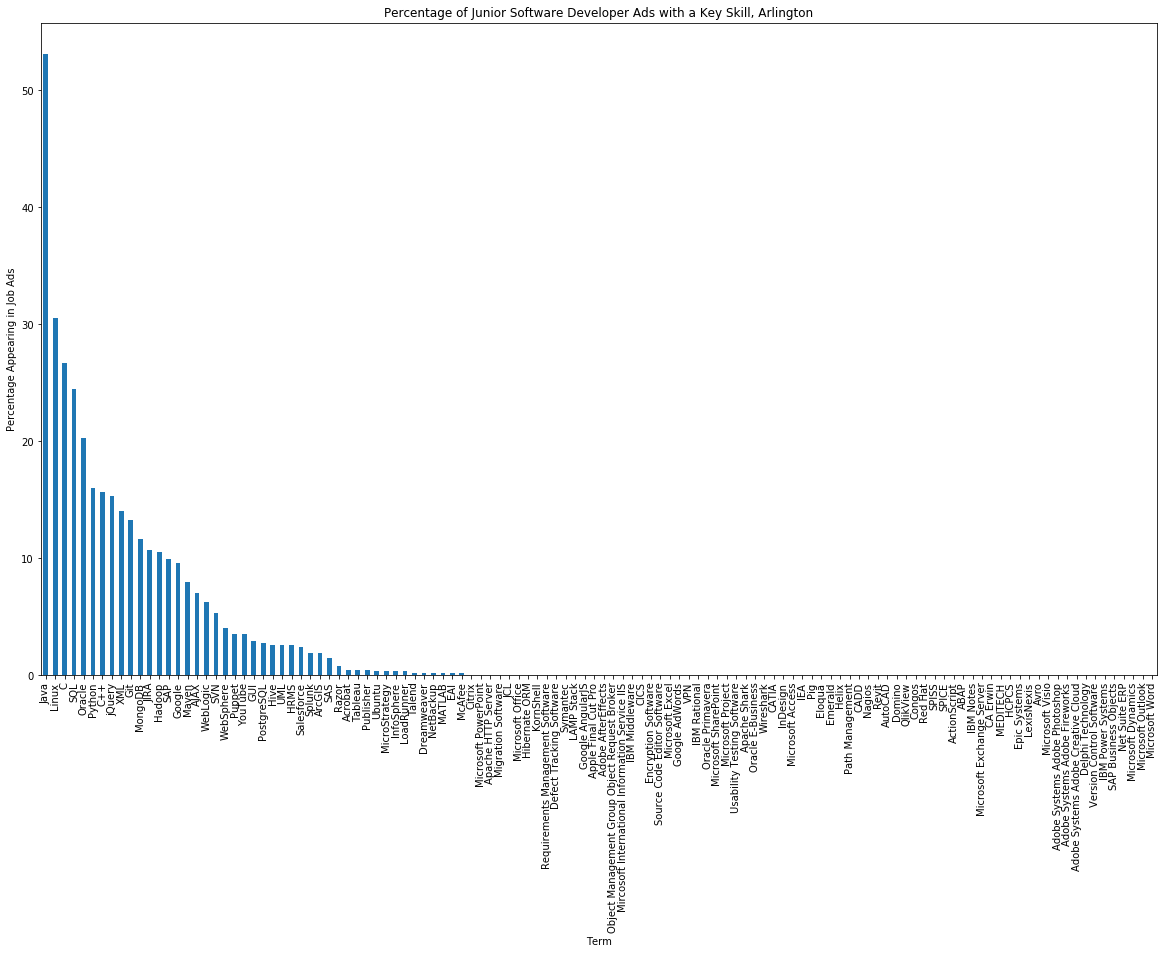

In [35]:
final_frame = pd.DataFrame(list(overall_total_skills.items()), columns = ['Term', 'NumPostings'])
#while 0 in final_frame: final_frame.remove(0)
    
#final_frame = final_frame.drop(final_frame[final_frame.NumPostings == 0].index)
    
final_frame.NumPostings = (final_frame.NumPostings)*100/len(job_descriptions)



final_frame.sort(columns = 'NumPostings', ascending = False, inplace = True)
    
final_plot = final_frame.plot(x = 'Term', kind = 'bar', legend = None,
                             title = 'Percentage of Junior Software Developer Ads with a Key Skill, ' + city_title)
final_plot.set_ylabel('Percentage Appearing in Job Ads')
fig = final_plot.get_figure()

fig.set_size_inches(20, 12)

In [25]:
#use this for coursera search df

,Term,NumPostings
78,Java,53.12
85,Linux,30.56
40,C,26.72
29,SQL,24.48
51,Oracle,20.32
79,Python,16.00
77,C++,15.68
115,jQuery,15.36
46,XML,14.08
56,Git,13.28
